### EDA household_power_consumption.csv

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk

In [39]:
df = pd.read_csv('core\static\data\household_power_consumption.csv', sep=';',
                parse_dates={'Datetime' : ['Date', 'Time']}, infer_datetime_format=True,
                low_memory=False)
df.info()

C:\Users\snemm\AppData\Local\Temp\ipykernel_22020\3678932487.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('core\static\data\household_power_consumption.csv', sep=';',
C:\Users\snemm\AppData\Local\Temp\ipykernel_22020\3678932487.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('core\static\data\household_power_consumption.csv', sep=';',
C:\Users\snemm\AppData\Local\Temp\ipykernel_22020\3678932487.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('core\static\data\hous

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    object        
 2   Global_reactive_power  object        
 3   Voltage                object        
 4   Global_intensity       object        
 5   Sub_metering_1         object        
 6   Sub_metering_2         object        
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


- 2   Global_active_power    object 
- 3   Global_reactive_power  object 
- 4   Voltage                object 
- 5   Global_intensity       object 
- 6   Sub_metering_1         object 
- 7   Sub_metering_2         object 


These are all object but need to be floats so let's change them to float64

In [40]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [41]:
df.shape

(2075259, 8)

In [42]:
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [43]:
df.isnull().sum()

Datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [44]:
# fill missing values
df.ffill(axis=0,inplace=True)
df.isnull().sum().sum()

0

## visualisation

In [45]:
#sns.pairplot(df)

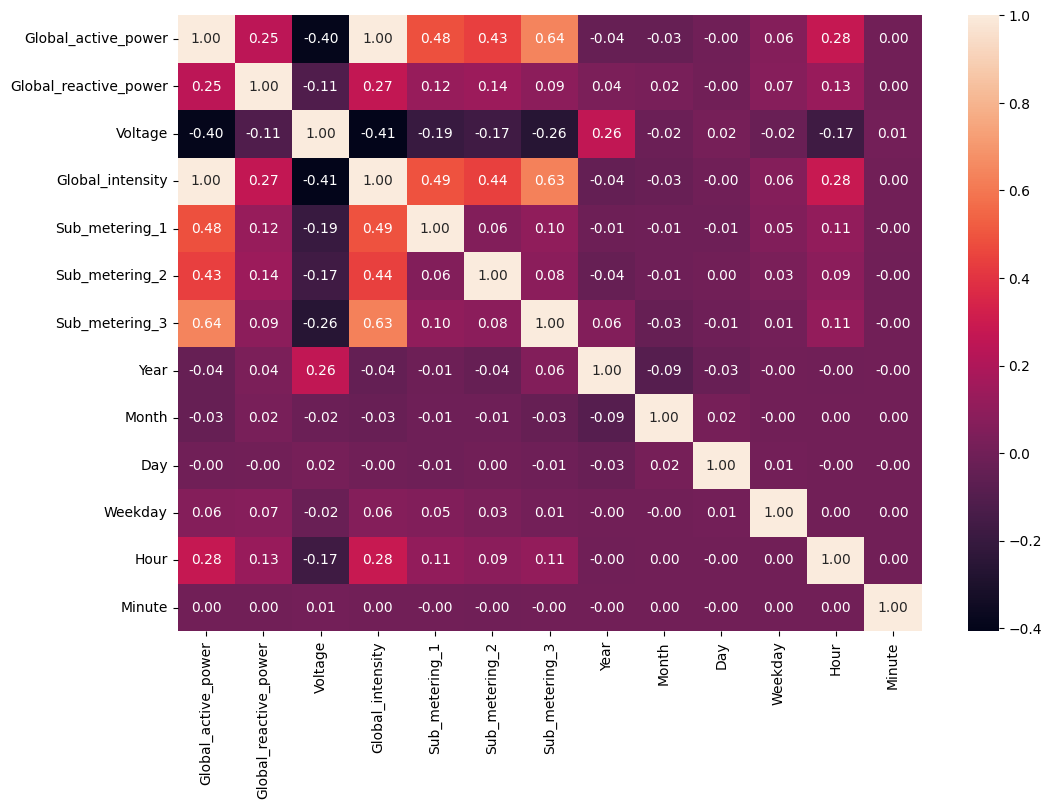

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Weekday,Hour,Minute
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,5,17,24
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,5,17,25
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,5,17,26
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,5,17,27
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,5,17,28


In [46]:
df_datetime = df.copy()

df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Weekday'] = df['Datetime'].dt.weekday  # monday=0, sunday=6
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute

df.drop('Datetime', axis=1, inplace=True)

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()
df.head()

In [47]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
tri_df = correlation_matrix.mask(mask)

corr_pairs = tri_df.unstack().sort_values(ascending=False)
high_corr_pairs = corr_pairs[corr_pairs > 0.0]
print("All correlations:")
print(high_corr_pairs)

All correlations:
Global_active_power    Global_intensity         0.998884
                       Sub_metering_3           0.639681
Global_intensity       Sub_metering_3           0.627569
                       Sub_metering_1           0.489283
Global_active_power    Sub_metering_1           0.484388
Global_intensity       Sub_metering_2           0.440359
Global_active_power    Sub_metering_2           0.434581
Global_intensity       Hour                     0.280122
Global_active_power    Hour                     0.279743
Global_reactive_power  Global_intensity         0.265558
Voltage                Year                     0.257956
Global_active_power    Global_reactive_power    0.246362
Global_reactive_power  Sub_metering_2           0.139438
                       Hour                     0.126429
                       Sub_metering_1           0.123135
Sub_metering_3         Hour                     0.113233
Sub_metering_1         Hour                     0.107944
             

In [48]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Year', 'Month', 'Day', 'Weekday', 'Hour']])
X_scaled = sm.add_constant(X_scaled)  # Add constant after scaling

# Check VIF to identify multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = ['const'] + ['Year', 'Month', 'Day', 'Weekday', 'Hour']
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)

# Assuming no multicollinearity or after addressing it, fit the model
y = df['Global_active_power']
model = sm.OLS(y, X_scaled, missing='drop').fit()
print(model.summary())

   feature       VIF
0    const  1.000000
1     Year  1.008743
2    Month  1.008346
3      Day  1.001175
4  Weekday  1.000062
5     Hour  1.000001
                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.085
Model:                             OLS   Adj. R-squared:                  0.085
Method:                  Least Squares   F-statistic:                 3.851e+04
Date:                 Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                         14:26:22   Log-Likelihood:            -2.9601e+06
No. Observations:              2075259   AIC:                         5.920e+06
Df Residuals:                  2075253   BIC:                         5.920e+06
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t

In [49]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.tree import DecisionTreeRegressor
# from math import sqrt

# X = df[['Year', 'Month', 'Day', 'Weekday', 'Hour']]
# y = df['Global_active_power']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = LinearRegression()

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print("Linear Regression:")
# print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
# print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
# print(f"r2 score: {r2_score(y_test, y_pred)}")
# print()

# model = DecisionTreeRegressor()

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print("Decision Tree Regression:")
# print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
# print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
# print(f"r2 score: {r2_score(y_test, y_pred)}")
# print()

# model = RandomForestRegressor(n_estimators=100, random_state=42)

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print("Random Forest:")
# print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
# print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
# print(f"r2 score: {r2_score(y_test, y_pred)}")
# print()

In [50]:
df_datetime.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [51]:
df_datetime.set_index('Datetime', inplace=True)
df_datetime = df_datetime.asfreq('min')

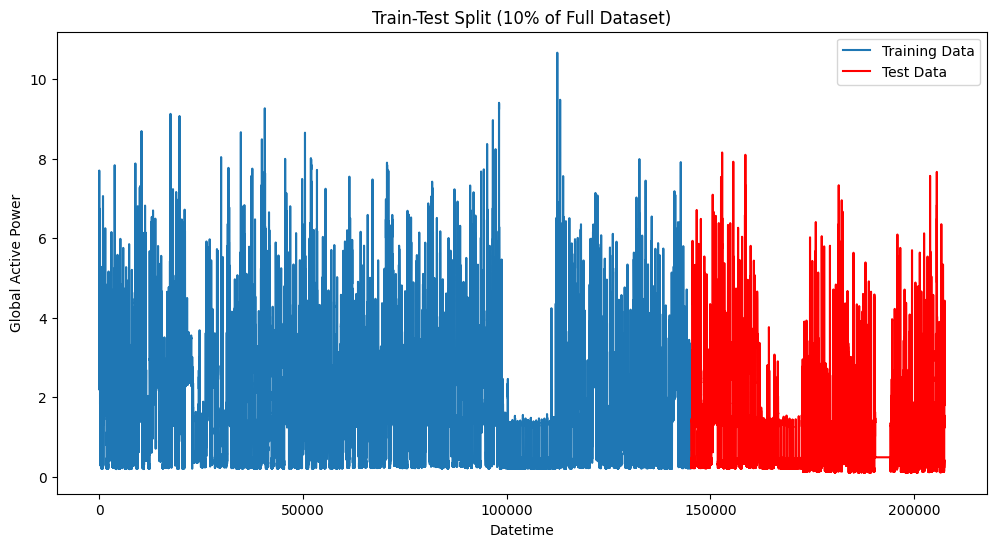

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:               145267
Model:                  ARIMA(5, 1, 0)   Log Likelihood              -55896.473
Date:                 Mon, 10 Jun 2024   AIC                         111804.946
Time:                         14:26:27   BIC                         111864.264
Sample:                              0   HQIC                        111822.650
                              - 145267                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0523      0.001    -44.869      0.000      -0.055      -0.050
ar.L2         -0.2348      0.001   -196.709      0.000      -0.237      -0.232
ar.L3         -0.1516      0.001   -128.794 

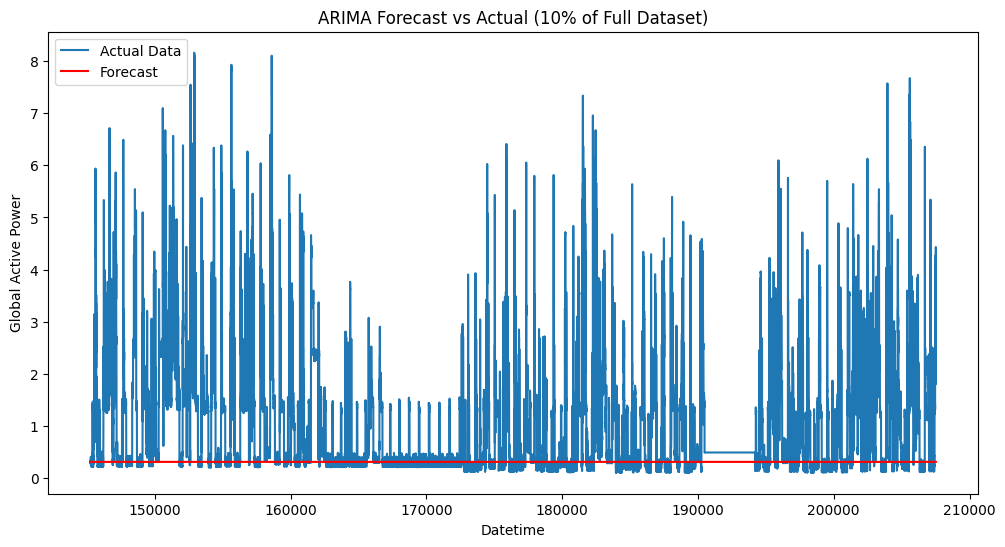

Mean Squared Error: 1.4775446770471603


In [52]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

subset_df = df.head(int(len(df) * 0.1))

split_ratio = 0.7
split_point = int(len(subset_df) * split_ratio)
train, test = subset_df[:split_point], subset_df[split_point:]

train_series = train['Global_active_power']
test_series = test['Global_active_power']

plt.figure(figsize=(12, 6))
plt.plot(train_series, label='Training Data')
plt.plot(test_series, label='Test Data', color='red')
plt.title('Train-Test Split (10% of Full Dataset)')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

model = ARIMA(train_series, order=(5, 1, 0))
model_fit = model.fit()

print(model_fit.summary())
forecast = model_fit.forecast(steps=len(test_series))

plt.figure(figsize=(12, 6))
plt.plot(test_series, label='Actual Data')
plt.plot(test_series.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (10% of Full Dataset)')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

mse = mean_squared_error(test_series, forecast)
print(f'Mean Squared Error: {mse}')

## ADF Test

De Augmented Dickey-Fuller (ADF)-testresultaten geven aan dat de p-waarde aanzienlijk lager is dan 0,05, wat erop wijst dat de reeks stationair is en geen verdere differentiatie vereist.

Gezien dit alles kunnen we ons concentreren op de andere stappen om de prestaties van het ARIMA-model te verbeteren. Laten we proberen de ARIMA-parameters aan te passen op basis van de ACF- en PACF-grafieken en ervoor te zorgen dat het model de trends effectief vastlegt.

In [53]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -18.322280581965057
p-value: 2.2645585671963605e-30


## ACF and PACF Plots

De ACF- en PACF-grafieken bieden waardevolle informatie voor het identificeren van de ARIMA-parameters. Zo interpreteert u deze plots:

ACF-plot:

De eerste significante piek bij lag 1 suggereert dat 
𝑞
q kan 1 zijn.
PACF-plot:

De eerste significante piek bij lag 1 suggereert dat 
𝑝
p kan 1 zijn.
Gegeven deze interpretaties kunnen we het ARIMA(1,1,1)-model proberen. Als de resultaten niet bevredigend zijn, kunnen we experimenteren met termen van hogere orde.

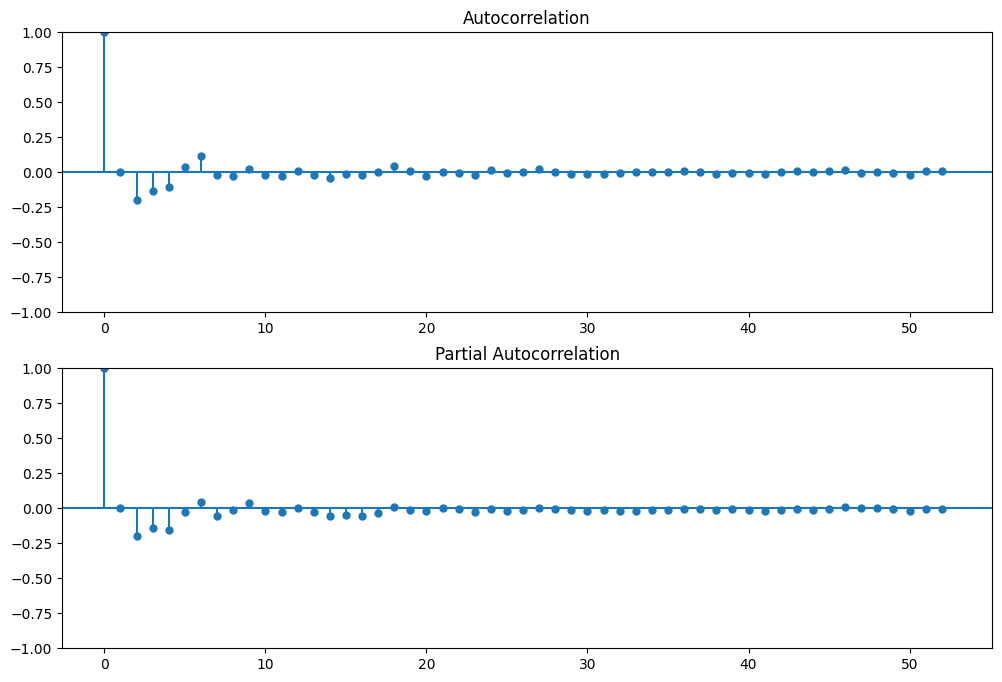

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train_series.diff().dropna(), ax=ax[0])
plot_pacf(train_series.diff().dropna(), ax=ax[1])
plt.show()

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:               145267
Model:                  ARIMA(1, 1, 1)   Log Likelihood              -58726.892
Date:                 Mon, 10 Jun 2024   AIC                         117459.784
Time:                         14:33:33   BIC                         117489.443
Sample:                              0   HQIC                        117468.636
                              - 145267                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7610      0.002    370.334      0.000       0.757       0.765
ma.L1         -0.9031      0.002   -589.701      0.000      -0.906      -0.900
sigma2         0.1314      0.000    825.941 

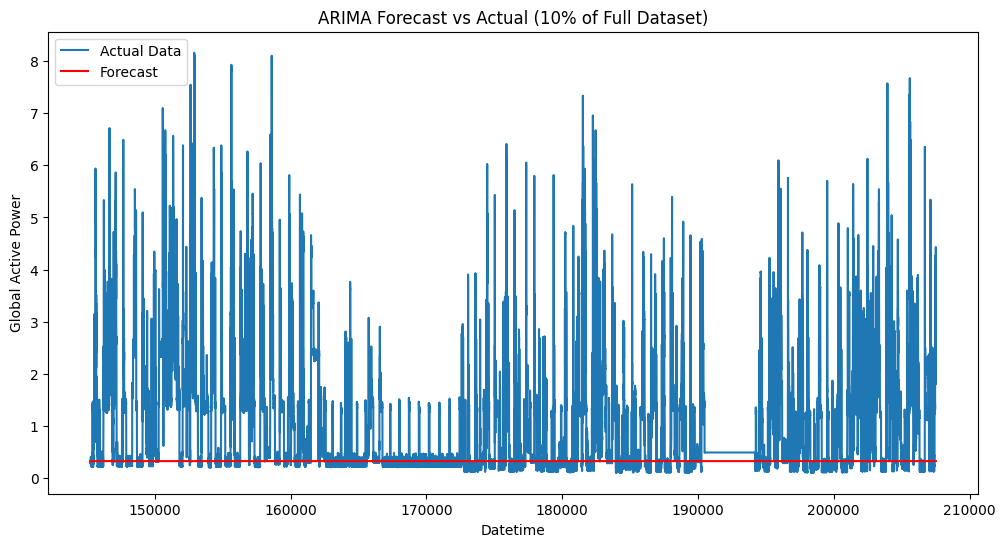

Mean Squared Error: 1.4587727281297027


In [55]:

model = ARIMA(train_series, order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())
forecast = model_fit.forecast(steps=len(test_series))

plt.figure(figsize=(12, 6))
plt.plot(test_series, label='Actual Data')
plt.plot(test_series.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (10% of Full Dataset)')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

mse = mean_squared_error(test_series, forecast)
print(f'Mean Squared Error: {mse}')

In [58]:
from pmdarima import auto_arima

scaler = StandardScaler()
train_series_scaled = scaler.fit_transform(train_series.values.reshape(-1, 1)).flatten()
test_series_scaled = scaler.transform(test_series.values.reshape(-1, 1)).flatten()

# model = auto_arima(train_series_scaled, seasonal=False, trace=True,
#                    error_action='ignore', suppress_warnings=True,
#                    stepwise=True)

# print(model.summary())

# best_order = model.order
# model_fit = ARIMA(train_series_scaled, order=best_order).fit()

# forecast_scaled = model_fit.forecast(steps=len(test_series_scaled))
# forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# plt.figure(figsize=(12, 6))
# plt.plot(test_series.index, test_series, label='Actual Data')
# plt.plot(test_series.index, forecast, label='Forecast', color='red')
# plt.title(f'ARIMA Forecast vs Actual (10% of Full Dataset)')
# plt.xlabel('Datetime')
# plt.ylabel('Global Active Power')
# plt.legend()
# plt.show()

# mse = mean_squared_error(test_series, forecast)
# print(f'Mean Squared Error: {mse}')